# Customer Segmentation in the US: Part 1
## Exploring the Data
___
In this notebook, data from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF) is used. The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic adn opinion information about families in US. The survey is conducted every three years, and here an extract of the results from 2022 are used.

To get the details about the features in the dataset, use the 
[Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk.htm).


### Import
___

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df= pd.read_csv("SCFP2022.csv")
df.shape

(22975, 357)

As can be seen above, the dataset is very large with 22975 observations and 357 features.

For the time being, we are going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years" which can be identified through the "TURNFEAR" column. 

In [10]:
df_credit_fear = df[df["TURNFEAR"] ==1]
print("df_credit_fear shape:", df_credit_fear.shape)
print("df_credit_fear type:", type(df_credit_fear))
df_credit_fear.head()

df_credit_fear shape: (3839, 357)
df_credit_fear type: <class 'pandas.core.frame.DataFrame'>


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


### Explore
___
Among different features that can be used, let's examine demographic features such as age, race, education, and income. Finally, their relationship to assets and debt will be investigated.

Let's start with ***age***. One of the features of the dataset is age group `AGECL`. Wht values are there in this column.

In [11]:
df_credit_fear["AGECL"].unique()

array([1, 4, 2, 3, 5, 6], dtype=int64)

From the Code Book, this column represents categorical data, however, the values in the column are numeric.

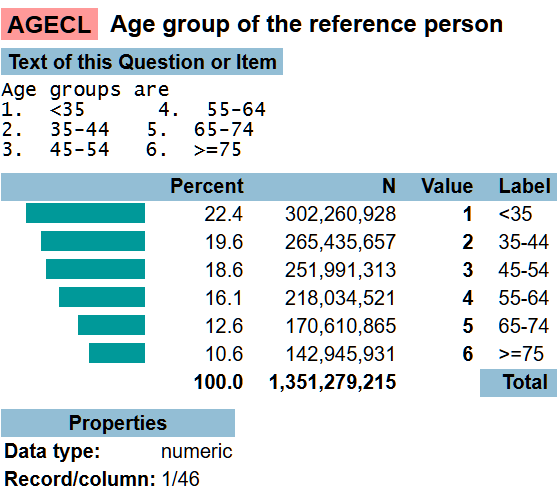

These numeric values should be changed to the actual labels. Then a bar chart is plotted to see the distribution of these age groups.

In [12]:
age_dict = {
    1: "Under 35",
    2: "35 - 44",
    3: "45 - 54",
    4: "55 - 64",
    5: "65 - 74",
    6: "75 or Above"
}

age = df_credit_fear["AGECL"].replace(age_dict)
age.head()

20    Under 35
21    Under 35
22    Under 35
23    Under 35
24    Under 35
Name: AGECL, dtype: object

In [13]:
age.value_counts()[list(val for val in age_dict.values())]

AGECL
Under 35       917
35 - 44        936
45 - 54        802
55 - 64        682
65 - 74        398
75 or Above    104
Name: count, dtype: int64

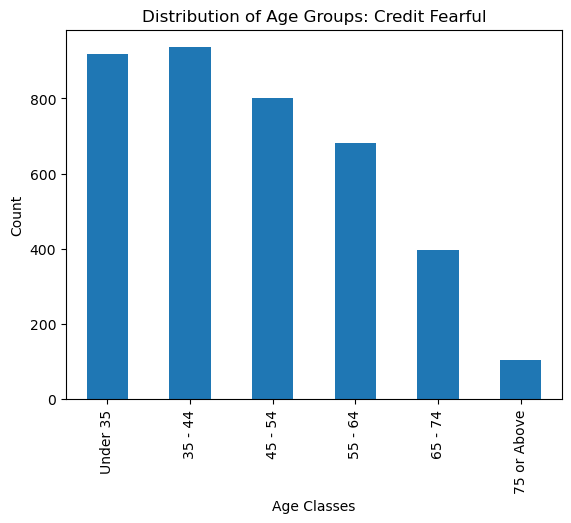

In [14]:
age_counts= age.value_counts()[list(val for val in age_dict.values())]
age_counts.plot(kind= "bar", xlabel= "Age Classes", ylabel= "Count",
                        title= "Distribution of Age Groups: Credit Fearful",
                        );

The bar plot indicates that those who fear being denied credit are more with age less than 54.

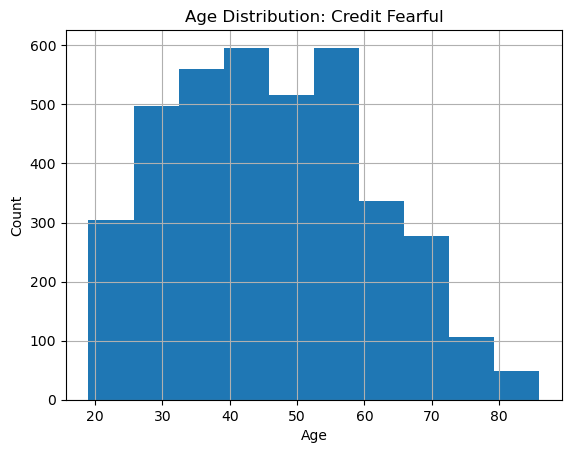

In [15]:
df_credit_fear["AGE"].hist(bins= 10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution: Credit Fearful");

The above histogram shows that the most concerned people seem to be 30 and 45, which supports the bar chart.

What about ***race***?

Looking for "RACE" in the Code Book,

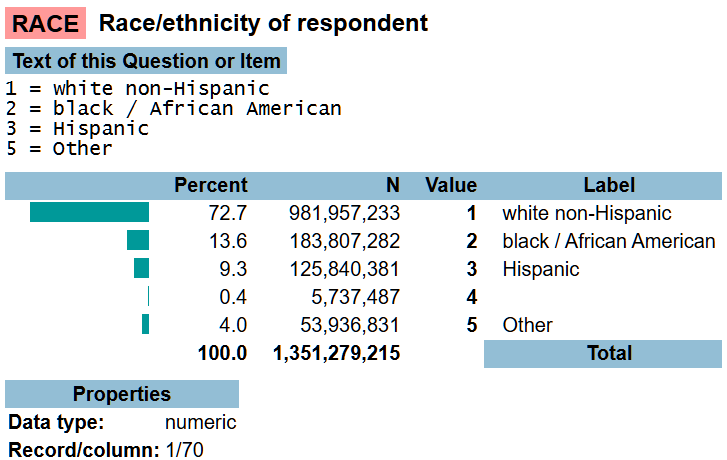

In the Code Book, 4 is not assigned to a specific race, hence let's make it "Asian American / Pacific Islander"
This column has numeric data type. So change it to something more understandable.
Then a horizontal bar chart is used to see the frequency of these races.

In [16]:
df_credit_fear["RACE"].value_counts(normalize= True)

RACE
1    0.386559
2    0.337327
3    0.206043
4    0.050274
5    0.019797
Name: proportion, dtype: float64

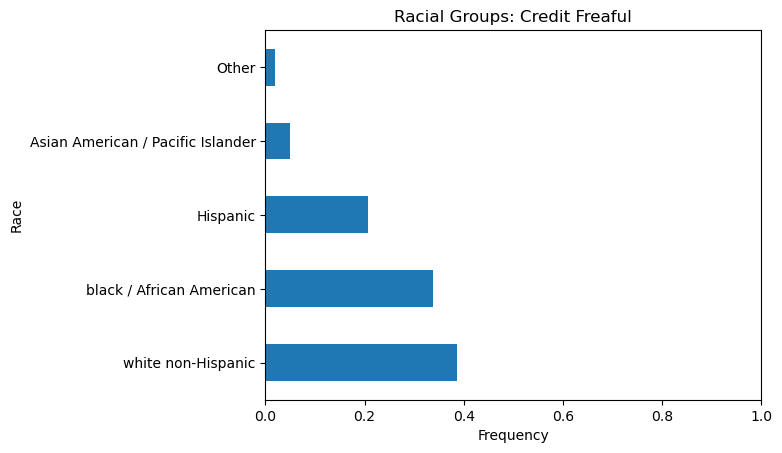

In [17]:
race_dict = {
    1: "white non-Hispanic",
    2: "black / African American",
    3: "Hispanic",
    4: "Asian American / Pacific Islander",
    5: "Other"
}

race_cat = df_credit_fear["RACE"].replace(race_dict)
race_cat.value_counts(normalize= True).plot(
    kind= "barh",
    xlabel= "Frequency",
    ylabel= "Race",
    title= "Racial Groups: Credit Freaful"
)
plt.xlim((0, 1));

This suggests that White non-Hispanic and Black / African American worry more about being denied credit, but is that also the case in the overall population?

In [18]:
df["RACE"].replace(race_dict).value_counts(normalize= True)

RACE
white non-Hispanic                   0.624548
black / African American             0.152035
Hispanic                             0.133841
Asian American / Pacific Islander    0.077693
Other                                0.011882
Name: proportion, dtype: float64

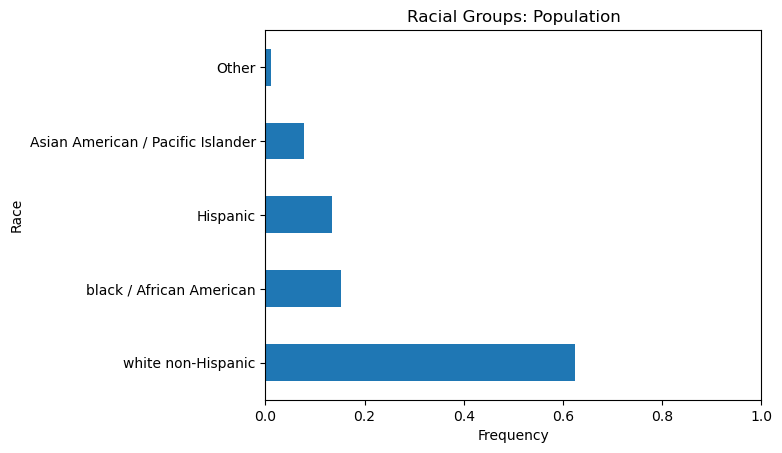

In [19]:
df["RACE"].replace(race_dict).value_counts(normalize= True).plot(
    kind= "barh",
    xlabel= "Frequency",
    ylabel= "Race",
    title= "Racial Groups: Population"
)
plt.xlim((0, 1));

From the population bar chart, White non-Hispanic account for 62% of the whole population, but only about 39% are credit fearful. On the onther hand, Black and Hispanic people represent 28% of the dataset, but 53% of those are credit fearful. This shows that Blck and Hispanic households are more likely to be in the credit fearful group.

***Income*** is another measure. Does people with lower income level worry about being denied credit, or is that something people with more money worry about?

Using a single side-by-side bar chart, the entire dataset is compared against the credit fearful group based on the income percentile groups, feature "INCCAT."

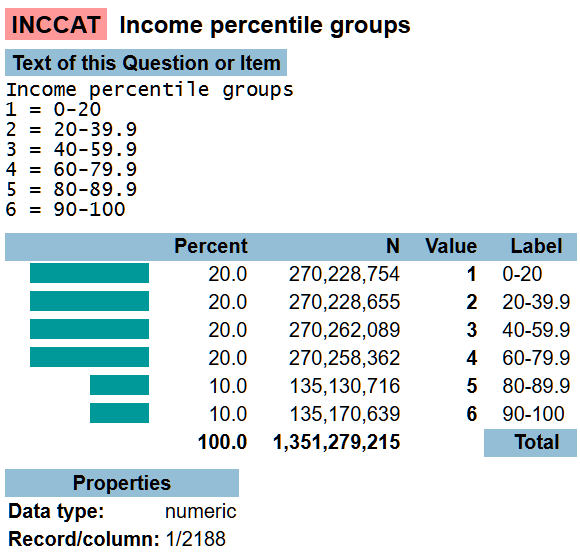

First change the numbers to actual values, then create a dataframe based on credit fearful and non-credit fearful households, income categories and their normalized frequency. Finally, use seaborn to plot bar chart.

In [20]:
income_cat = {
    1: "0 - 20",
    2: "20 - 39.9",
    3: "40 - 59.9",
    4: "60 - 79.9",
    5: "80 - 89.9",
    6: "90 - 100"
}

df_income_freq = (
    df["INCCAT"]
    .replace(income_cat)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize= 1)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

df_income_freq

,TURNFEAR,INCCAT,frequency
0,0,90 - 100,0.303982
1,0,60 - 79.9,0.162312
2,0,40 - 59.9,0.144492
3,0,0 - 20,0.140050
4,0,20 - 39.9,0.139162
5,0,80 - 89.9,0.110002
6,1,0 - 20,0.340714
7,1,20 - 39.9,0.266476
8,1,40 - 59.9,0.205001
9,1,60 - 79.9,0.112529


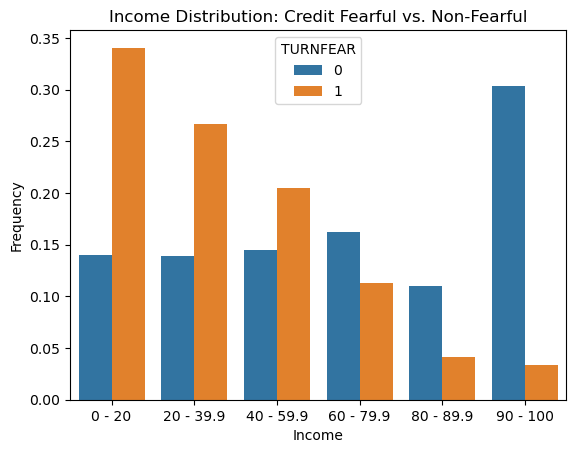

In [21]:
sns.barplot(
    x = "INCCAT",
    y = "frequency",
    hue = "TURNFEAR",
    data= df_income_freq,
    order= income_cat.values()
)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution: Credit Fearful vs. Non-Fearful");

From the above comparison, credit fearful households are much more common in the lower income categories. That means, credit fearfuls have lower incomes.

Based on all this, among credit fearful households, the highest number of households have lower income and are young.

***Assets***

From the dataset, let's examine the correlation between assets and value of houses.
Then, credit fearful group is used.

In [22]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("Dataset: asset-houses correlation:", round(asset_house_corr, 3))

Dataset: asset-houses correlation: 0.562


In [23]:
asset_house_corr_fear = df_credit_fear["ASSET"].corr(df_credit_fear["HOUSES"])
print("Credit fearful: asset-house correlation:", round(asset_house_corr_fear, 3))

Credit fearful: asset-house correlation: 0.365


The dataset shows a moderate positive correlation which indicates that the value of houses makes most of the the households assets.

On the other hand, for credit-fearful group, the correlation is weaker and indicates that value of houses has less contribution to the households assets.

Let's make correlation matrics for both dataset and the credit-fearful group using 5 features: asset, value of houses, income, debt, and education level.

In [24]:
features= ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[features].corr()
corr.style.background_gradient(axis= None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561776,0.706685,0.307137,0.120137
HOUSES,0.561776,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307137,0.251876,0.306534,1.000000,0.086561
EDUC,0.120137,0.186120,0.096549,0.086561,1.000000


In [25]:
corr = df_credit_fear[features].corr()
corr.style.background_gradient(axis= None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364948,0.893282,0.477171,0.110655
HOUSES,0.364948,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110655,0.195174,0.108845,0.182570,1.000000


Now, we can see that the correlation between asset and income increases from 0.70 to 0.89 which indicates that for credit-fearful group, income takes most of their asset. Similar trend is also shown for debt and houses. As for credit fearful group, value of houses has stronger correlation with debt as compared to the overall dataset.

Hence credit-fearful households base their assets on their income rather than the value of their houses.

What about ***education***?

Let's compare credit fearful and non-credit fearful groups for education levels.

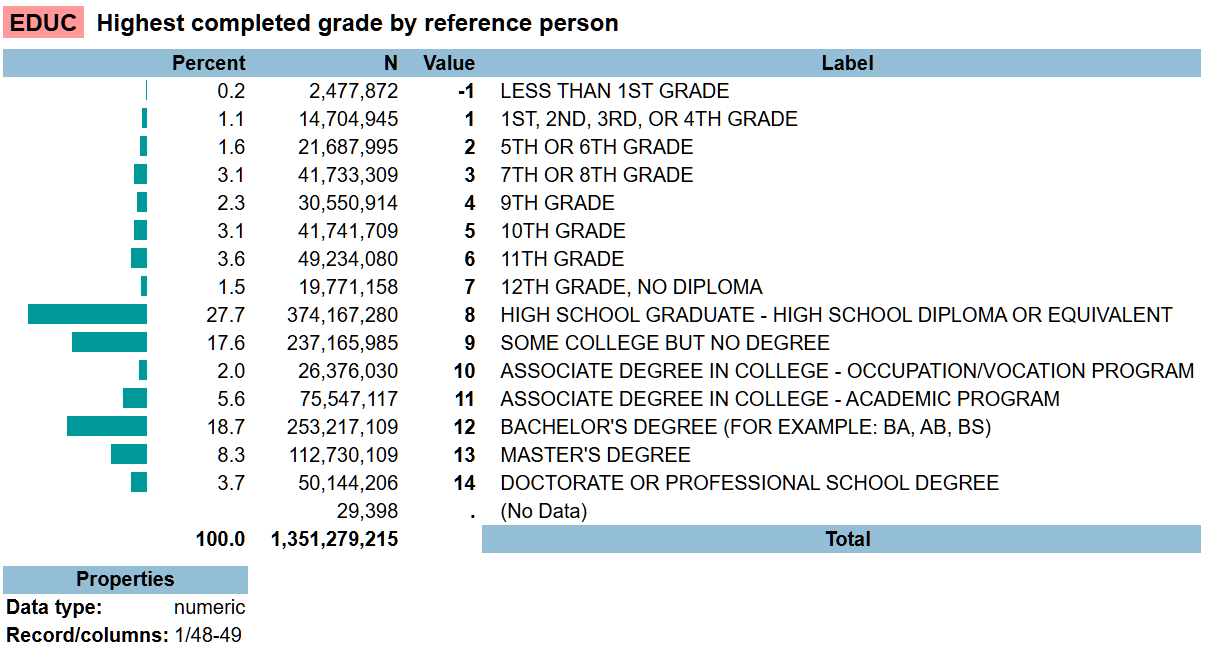

First a dataframe containing the relative frequency of education levels grouped by credit fearful and non-credit fearful groups is created. Then a side-by-side bar chart is used to compare the two groups. 

In [26]:
educ_levels_freq = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize= True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

educ_levels_freq

,TURNFEAR,EDUC,frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539
5,0,10,0.049122
6,0,11,0.041283
7,0,7,0.016722
8,0,6,0.012176
9,0,4,0.010974


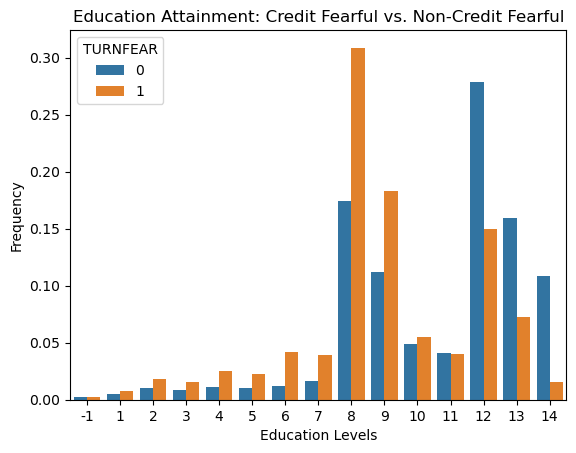

In [27]:
sns.barplot(
    x = "EDUC",
    y = "frequency",
    hue = "TURNFEAR",
    data = educ_levels_freq
)
plt.xlabel("Education Levels")
plt.ylabel("Frequency")
plt.title("Education Attainment: Credit Fearful vs. Non-Credit Fearful");

Most of the credit-fearful respondents are high school graduates. On the other hand, university degrees are more common among the non-credit fearful.

***Debt***

Using scatter plot, debt and 

In [28]:
from sklearn

SyntaxError: invalid syntax (2713175550.py, line 1)